### PCA

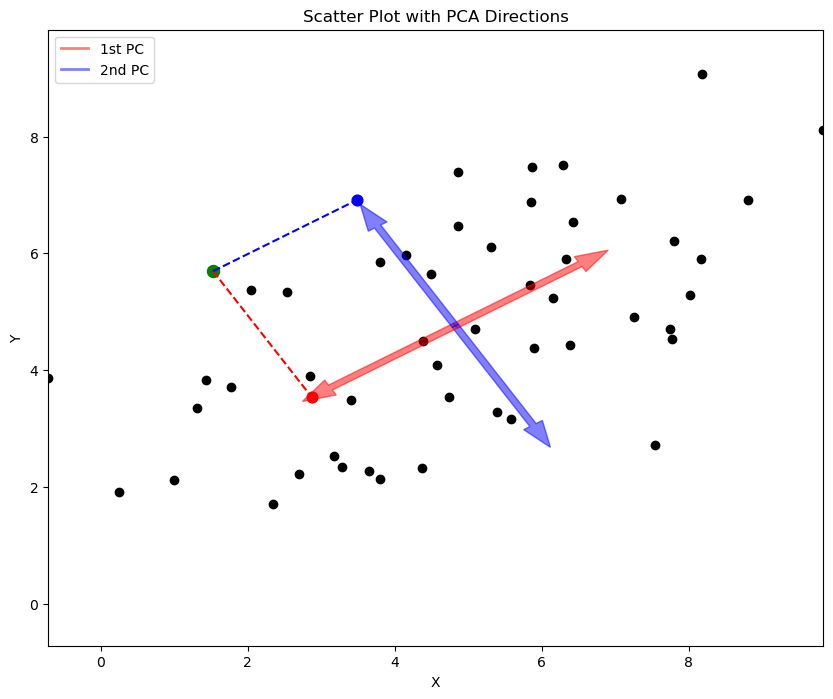

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Generate 2D data using bivariate normal
np.random.seed(123)  # For reproducibility
mu = [5, 5]  # mean for x and y
sigma = np.array([[4, 2], [2, 3]])  # covariance matrix

data = np.random.multivariate_normal(mu, sigma, 50)
x = data[:, 0]
y = data[:, 1]

# Get the range for both x and y axes
plot_range = [np.min([x, y]), np.max([x, y])]

# 2. Plotting the Scatter Plot
plt.figure(figsize=(10, 8))
plt.scatter(x, y, c='black', marker='o', label="Data Points")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Scatter Plot with PCA Directions")
plt.xlim(plot_range)
plt.ylim(plot_range)

# 3. Calculating Eigenvectors using PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2) # create an pca instance
# The fit_transform() method fits the PCA model to the data and then transforms 
# the data into the reduced dimensional space.
pca_result = pca.fit_transform(data)
# pca_result: pc matrix, shape (num_obs, num_pcs)

# pca.components_ contains the eigenvectors
eigenvectors = pca.components_


# 4. Plotting the Eigenvectors with transparent colors
# Arrows for the positive direction of the PCs
# all vectors are scaled by 2 for better visualization
plt.arrow(np.mean(x), np.mean(y), eigenvectors[0, 0]*2, eigenvectors[0, 1]*2, 
          color='red', alpha=0.5, width=0.1)
plt.arrow(np.mean(x), np.mean(y), eigenvectors[1, 0]*2, eigenvectors[1, 1]*2, 
          color='blue', alpha=0.5, width=0.1)

# Arrows for the negative direction of the PCs
plt.arrow(np.mean(x), np.mean(y), -eigenvectors[0, 0]*2, -eigenvectors[0, 1]*2, 
          color='red', alpha=0.5, width=0.1)
plt.arrow(np.mean(x), np.mean(y), -eigenvectors[1, 0]*2, -eigenvectors[1, 1]*2, 
          color='blue', alpha=0.5, width=0.1)

# Legend
plt.legend(handles=[plt.Line2D([0], [0], color='red', alpha=0.5, lw=2, label='1st PC'),
                    plt.Line2D([0], [0], color='blue', alpha=0.5, lw=2, label='2nd PC')],
           loc="upper left")

# Highlight a selected point and its projections
selected_point = data[24]

# Plot the selected point in green
plt.scatter(selected_point[0], selected_point[1], color="green", s=75)

# Calculate the projections of the selected point onto the PCA directions
proj_PC1 = np.dot(selected_point - np.mean(data, axis=0), eigenvectors[0]) * eigenvectors[0] + np.mean(data, axis=0)
proj_PC2 = np.dot(selected_point - np.mean(data, axis=0), eigenvectors[1]) * eigenvectors[1] + np.mean(data, axis=0)

# Plot the projection on PC1 using a red dashed line and mark the end point with a red circle
plt.plot([selected_point[0], proj_PC1[0]], [selected_point[1], proj_PC1[1]], "r--")
plt.scatter(proj_PC1[0], proj_PC1[1], color="red", s=60)

# Plot the projection on PC2 using a blue dashed line and mark the end point with a blue circle
plt.plot([selected_point[0], proj_PC2[0]], [selected_point[1], proj_PC2[1]], "b--")
plt.scatter(proj_PC2[0], proj_PC2[1], color="blue", s=60)

plt.show()


### Data example

(32, 10)


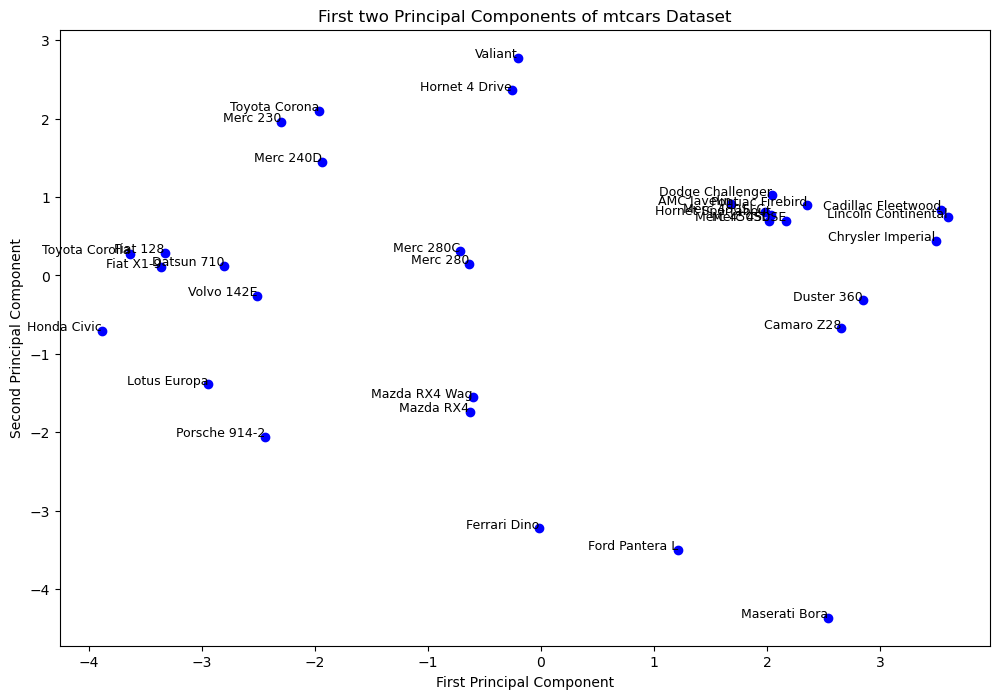

In [51]:
import numpy as np
import matplotlib.pyplot as plt

# Load the mtcars dataset from mtcars.txt file using numpy
mtcars_data = np.loadtxt('./data/mtcars.txt', delimiter='\t', skiprows=1, usecols=range(1, 12))
car_names = np.loadtxt('./data/mtcars.txt', delimiter='\t', skiprows=1, usecols=0, dtype=str)


# Drop the "mpg" column (which is the first column after car names)
mtcars_data = mtcars_data[:, 1:]
# Extract variable names from the mtcars dataset (excluding "mpg")
variable_names = np.loadtxt('./data/mtcars.txt', delimiter='\t', max_rows=1, dtype=str)[1:]

print(mtcars_data.shape)

# 1. Data Preparation
# Scale the data to have mean 0 and unit variance using numpy
mean_mtcars = np.mean(mtcars_data, axis=0)
std_mtcars = np.std(mtcars_data, axis=0)
scaled_mtcars = (mtcars_data - mean_mtcars) / std_mtcars

# 2. PCA using numpy's SVD (Singular Value Decomposition)
U, S, VT = np.linalg.svd(scaled_mtcars, full_matrices=False)

# The principal components are given by the dot product of U and S
principal_components = np.dot(U, np.diag(S))

# 3. Visualization
# Extract the first two principal components for plotting
# Depending on the algorithm and the platform, you might get PCs that point in opposite direction
# we flip the PC2 to make a plot. This is just to make it consistent with R code result.

PC1 = principal_components[:, 0]
PC2 = - principal_components[:, 1]

# Plot the first two principal components
plt.figure(figsize=(12, 8))
for i, txt in enumerate(car_names):
    plt.scatter(PC1[i], PC2[i], color='blue', marker='o')
    plt.annotate(txt, (PC1[i], PC2[i]), fontsize=9, ha='right')
    
plt.title("First two Principal Components of mtcars Dataset")
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.show()



[5.9460309  2.73511555 0.61647985 0.27820044 0.22941942 0.21689542
 0.13720783 0.08328421 0.05538307 0.02456395]
[0.57602174 0.84098606 0.90070755 0.92765822 0.94988322 0.97089497
 0.98418697 0.99225513 0.99762037 1.        ]


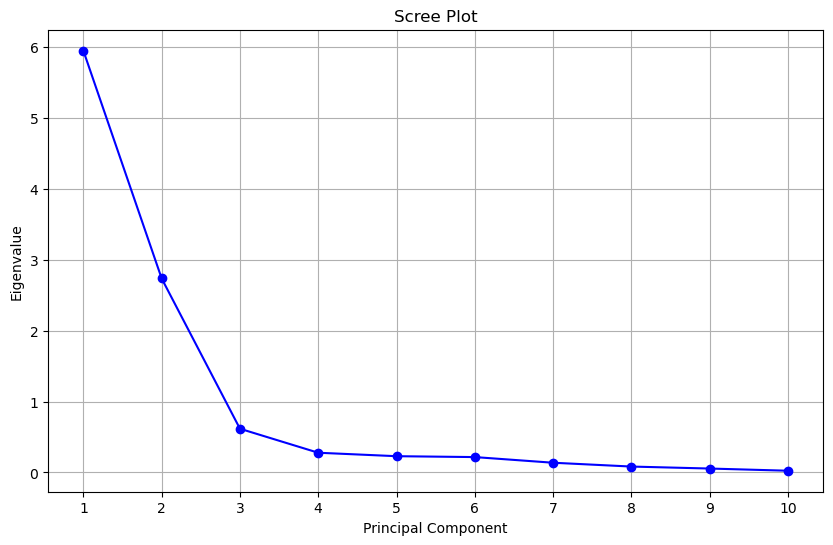

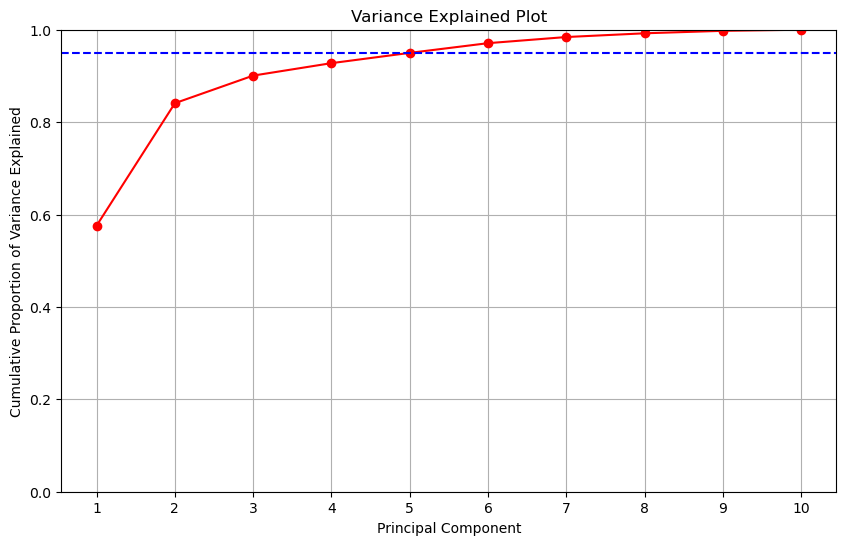

In [52]:
## Scree plot and variance explained plot

# Calculate the eigenvalues (variances)
eigenvalues = (S ** 2) / (scaled_mtcars.shape[0] - 1)

print(eigenvalues)

# Calculate the cumulative variance ratio
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

print(cumulative_variance_ratio)

# Adjust x values to start from 1 for both plots
# This code will correctly start the x-axis values from 1 for both the Scree 
# Plot and the Variance Explained Plot.
x_values = np.arange(1, len(eigenvalues) + 1)

# (1). Scree Plot
plt.figure(figsize=(10, 6))
plt.plot(x_values, eigenvalues, 'o-', color='blue')
plt.title("Scree Plot")
plt.xlabel("Principal Component")
plt.ylabel("Eigenvalue")
plt.grid(True)
plt.xticks(x_values)
plt.show()

# (2). Variance Explained Plot
plt.figure(figsize=(10, 6))
plt.plot(x_values, cumulative_variance_ratio, 'o-', color='red')
plt.title("Variance Explained Plot")
plt.xlabel("Principal Component")
plt.ylabel("Cumulative Proportion of Variance Explained")
plt.axhline(y=0.95, color='blue', linestyle='--')
plt.ylim(0, 1)
plt.grid(True)
plt.xticks(x_values)
plt.show()


In [53]:
### individual case' contribution

# Compute the squared scores
squared_scores = principal_components ** 2

# Compute the contribution of each observation to PC1 and PC2
contribution_PC1 = squared_scores[:, 0] / np.sum(squared_scores[:, 0])
contribution_PC2 = squared_scores[:, 1] / np.sum(squared_scores[:, 1])

# Print the contributions
contributions = {
    'Contribution_to_PC1': contribution_PC1,
    'Contribution_to_PC2': contribution_PC2
}
print(contributions)


{'Contribution_to_PC1': array([2.16785446e-03, 1.98591357e-03, 4.25802045e-02, 3.64497734e-04,
       2.24117554e-02, 2.27696434e-04, 4.39521039e-02, 2.03895890e-02,
       2.87057666e-02, 2.20125896e-03, 2.75026326e-03, 2.55111569e-02,
       2.20053875e-02, 2.13338807e-02, 6.79871248e-02, 7.02275606e-02,
       6.62201249e-02, 6.01433560e-02, 8.18402450e-02, 7.17320151e-02,
       2.08893925e-02, 2.27554249e-02, 1.53589222e-02, 3.83464125e-02,
       3.00832713e-02, 6.11843901e-02, 3.23004868e-02, 4.70948316e-02,
       7.97668161e-03, 1.09109586e-06, 3.50321785e-02, 3.42391615e-02]), 'Contribution_to_PC2': array([3.57025954e-02, 2.84942085e-02, 1.77367177e-04, 6.59257128e-02,
       7.08053865e-03, 9.10697389e-02, 1.19423337e-03, 2.49421730e-02,
       4.54746783e-02, 2.68409192e-04, 1.11889426e-03, 5.75185115e-03,
       5.76126767e-03, 7.76306839e-03, 8.34549533e-03, 6.58388439e-03,
       2.33916295e-03, 1.01211286e-03, 5.85013685e-03, 8.99287170e-04,
       5.21007881e-02, 1.242

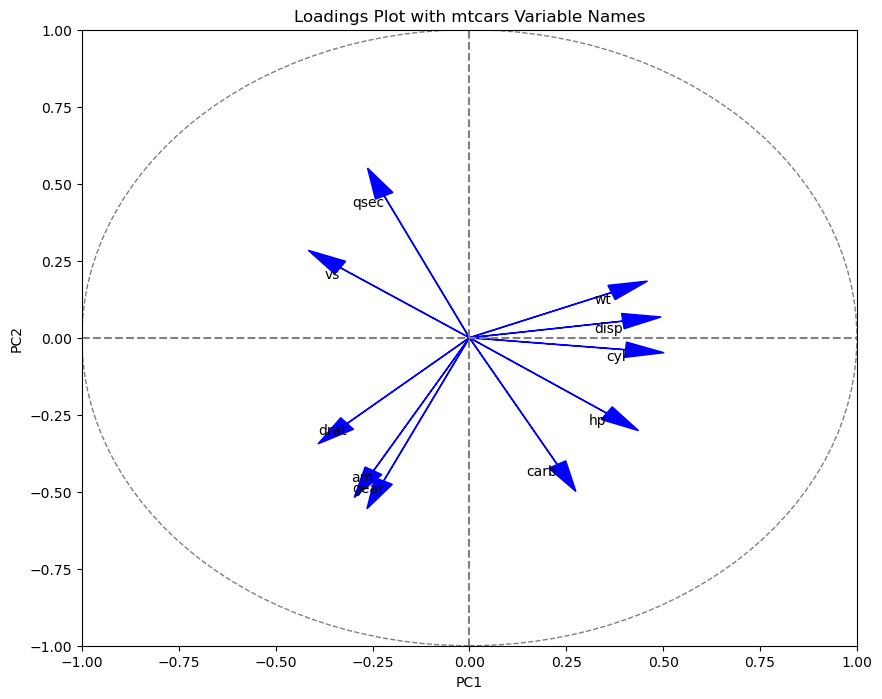

In [57]:
### variable correlation plot

# Extract the loadings for the first two principal components from VT
loadings = VT[:2, :].T
# loadings.shape: (10, 2)

# we flip the second PC direction in VT
# Flip the sign of the second row in loadings
# again, this is just to make it consistent with R code result
loadings[:, 1] = -loadings[:, 1]

plt.figure(figsize=(10, 8))

# Set plot limits and labels
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Loadings Plot with mtcars Variable Names")

# Add vectors for loadings with variable names
for i in range(loadings.shape[0]):
    plt.arrow(0, 0, loadings[i, 0], loadings[i, 1], color='blue', head_width=0.05, head_length=0.1)
    plt.text(loadings[i, 0], loadings[i, 1], variable_names[i], color='black', ha='right', va='top')

# Add a circle with radius 1
circle = plt.Circle((0, 0), 1, color='gray', fill=False, linestyle='--')
plt.gca().add_patch(circle)

plt.show()

In [73]:
import numpy as np

# Given: loadings from the VT matrix and eigenvalues

# (1) Contribution of the Variable
squared_loadings = np.square(loadings)
contribution_PC1 = squared_loadings[:, 0] / np.sum(squared_loadings[:, 0])
contribution_PC2 = squared_loadings[:, 1] / np.sum(squared_loadings[:, 1])
contributions = {
    "Contribution_to_PC1": contribution_PC1,
    "Contribution_to_PC2": contribution_PC2
}

# (2) Contribution of the Variable in Variance

# Compute squared loadings for all PCs
squared_loadings_all = VT.T ** 2

# Compute the weighted total contribution of each variable across all PCs
weighted_total_contribution_all = np.dot(squared_loadings_all, np.diag(eigenvalues))

# Sum across all PCs to get the total contribution for each variable
total_contribution_per_variable_all = np.sum(weighted_total_contribution_all, axis=0)

# Compute proportional total contribution
proportional_weighted_total_contribution_all = total_contribution_per_variable_all / np.sum(eigenvalues)

weighted_contributions_all = {
    "Variable": variable_names,
    "Weighted_Total_Contribution": total_contribution_per_variable_all,
    "Proportional_Weighted_Total_Contribution": proportional_weighted_total_contribution_all
}

In [74]:
weighted_contributions_all

{'Variable': array(['cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear',
        'carb'], dtype='<U4'),
 'Weighted_Total_Contribution': array([5.9460309 , 2.73511555, 0.61647985, 0.27820044, 0.22941942,
        0.21689542, 0.13720783, 0.08328421, 0.05538307, 0.02456395]),
 'Proportional_Weighted_Total_Contribution': array([0.57602174, 0.26496432, 0.05972149, 0.02695067, 0.02222501,
        0.02101174, 0.01329201, 0.00806816, 0.00536523, 0.00237963])}